# Imports

In [290]:
import cmath
import scipy
import pickle
import numpy as np
import pandas as pd
# import iminuit as im
from scipy.stats import poisson
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
plt.rcParams['figure.facecolor'] = 'w'
plt.rc('text.latex', preamble=r'\usepackage[detect-all,locale=FR]{siunitx}[=v2]')
import random

from itertools import cycle

## Def colors

In [263]:
cycle_colors = cycle(["orchid",
                "cornflowerblue",
                "limegreen", 
                "orange",
                "firebrick"])

colors = ["orchid",
         "cornflowerblue",
         "limegreen", 
         "orange",
         "firebrick"]

In [264]:
def fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
            fltrd=False, vert=True, lgd=True, ncols=None):
    w0 = 2*np.pi*f0
    siglist = [sk*np.sin(k*w0*tlin + fk)
               for k,sk,fk in zip(klist, sklist, fklist)]
    sigsum = s0 + sum(siglist)

    tfrq = np.arange(0, 1+dt, dt)
    # tfrq = np.arange(0, sig.shape[-1]) * dt
    sigfrqlst = [sk*np.sin(k*w0*tfrq + fk)
                 for k,sk,fk in zip(klist, sklist, fklist)]
    sigfrq = s0 + sum(sigfrqlst)

    # Here it's assumes analytic signal (real signal...) - so only half of the axis is required

    if sigfrq.shape[0] % 2 != 0:
        # warnings.warn("signal preferred to be even in size, autoFixing it...")
        tfrq = tfrq[0:-1]
        sigfrq = sigfrq[0:-1]

    sigFFT = np.fft.fft(sigfrq) / tfrq.shape[0]  # Divided by size t for coherent magnitude

    freq = np.fft.fftfreq(tfrq.shape[0], d=dt)

    # Plot analytic signal - right half of frequence axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if vert:
        fig = plt.figure(figsize=[5,7])
        ax1 = fig.add_axes([0.1, 0.10, 0.8, 0.35])
        ax2 = fig.add_axes([0.1, 0.50, 0.8, 0.35])
    else:
        fig = plt.figure(figsize=[13,5])
        ax1 = fig.add_axes([0.5, 0.10, 0.33, 0.8])
        ax2 = fig.add_axes([0.1, 0.10, 0.33, 0.8])

    # ax1.plot(freqAxisPos,
    #          np.abs(sigFFTPos))
    ax1.plot([0,0], [0,s0],
             marker="o", markersize="10", markevery=[1],
             color="k", lw=2)
    ax2.plot(tlin, sigsum,
              lw=2,
              color='k', label='$s(t)$')
    ax2.axhline(s0, ls='--',
                color='k', label=fr'$s_0 = {s0}$')
    for k in range(len(klist)):
        if len(klist) > 5:
          col = next(cycle_colors)
        else:
          col = colors[k]
        ax1.plot([klist[k]*f0,klist[k]*f0], [0,sklist[k]],
                  marker="o", markersize="10", markevery=[1],
                  color=col, lw=2)
        ax2.plot(tlin, siglist[k],
                  color=col,
                  alpha=.5,
                  label=fr'$s_{{{klist[k]*f0}}} = {sklist[k]:.2f}$')

    if lgd:
        if vert:
            ax2.legend(loc='upper right', fontsize=18)
        else:
            if ncols is None:
                ncols=len(klist)+2
            else:
                pass
            ax2.legend(ncol=ncols,
                       loc='upper center',
                       bbox_to_anchor=(1.05, 1.1),
                       fancybox=True, shadow=True,
                       fontsize=10)
    ax1.set_ylim(bottom=0)
    # ax1.set_xlim(left=-1)
    ax2.set_xlim(min(tlin), max(tlin))

    ax1.grid(linestyle=':')
    ax1.tick_params(labelsize='xx-large')
    ax2.grid(linestyle=':')
    ax2.tick_params(labelsize='xx-large')

    ax1.set_xlabel('$f$ (Hz)', fontsize=20)
    ax1.set_ylabel('$s_k$', fontsize=20)
    ax2.set_xlabel('$t$ (s)', fontsize=20)
    ax2.set_ylabel('$s(t)$', fontsize=20)

    # fig.suptitle('Test')

    # return sigFFTPos, freqAxisPos
    return fig

# Build a signal within Nyquist - the result will be the positive FFT with actual magnitude
# def sig(t, f0, s0, klist, sklist, fklist):
#     w0 = 2*np.pi*f0
#     siglist = [sk*np.sin(k*w0*t + fk) for k,sk,fk in zip(klist, sklist, fklist)]
#     sigsum = s0 + sum(siglist)
#     return(sigsum, siglist)
# 
# tlin = np.linspace(0, 2.5e-2, 1000)
# f0 = 50 # Hz
# s0 = 0
# klist = [1, 10]
# sklist = [1, 0.2]
# fklist = [0, 0]
# sigsum, siglist = sig(tlin, f0, s0, klist, sklist, fklist)
# 
# plt.axhline(s0, label=fr'$s_0 = {s0}$')
# for k in range(len(siglist)):
#   plt.plot(tlin, siglist[k], label=fr'$s_{{{klist[k]*f0}}} = {sklist[k]}$')
# plt.plot(tlin, sigsum)
# plt.legend()
# plt.show()
# 
# dt = 1/1100
# tfrq = np.arange(0, 1 + dt, dt)
# sigfft, _ = sig(tfrq, f0, s0, klist, sklist, fklist)
# Result in frequencies

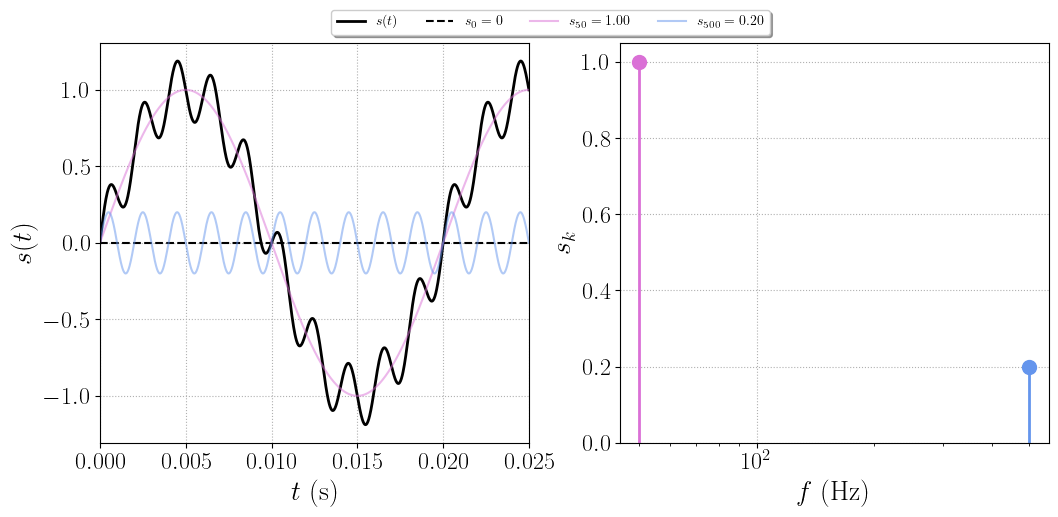

In [287]:
f0 = 50 # Hz
tlin = np.linspace(0, 2.5e-2, 1000)
dt = 1/1100

s0 = 0
klist = [1, 10]
sklist = [1, 0.2]
fklist = [0, 0]

fig = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
              fltrd=False, vert=False, lgd=True, ncols=6)
fig.savefig(f"../figures/fft_{f0}_{klist[:]}_{sklist[:]}.pdf".replace(" ",
                                                                      ""),
            bbox_inches="tight")

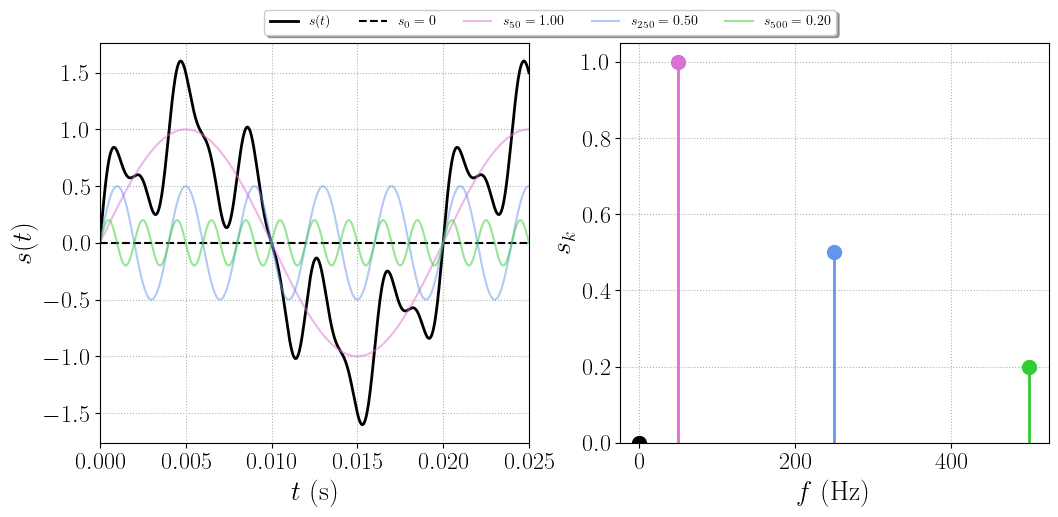

In [244]:
f0 = 50 # Hz
tlin = np.linspace(0, 2.5e-2, 1000)
dt = 1/1100

s0 = 0
klist = [1, 5, 10]
sklist = [1,.5, 0.2]
fklist = [0, 0, 0]

fig = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt, False)
fig.savefig(f"../figures/fft_{f0}_{klist[:]}_{sklist[:]}.pdf".replace(" ",
                                                                      ""),
            bbox_inches="tight")


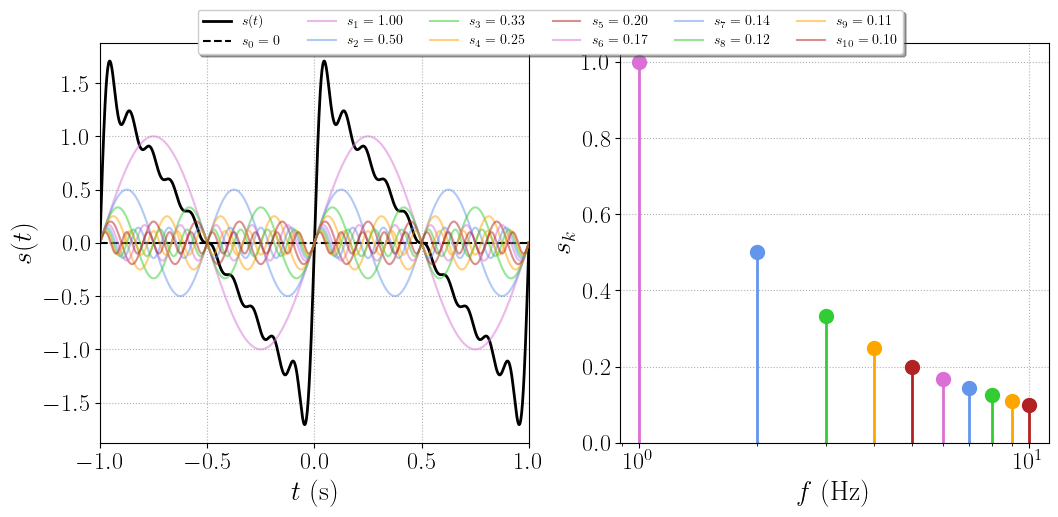

In [288]:
f0 = 1 # Hz
tlin = np.linspace(-1, 1, 1000)
dt = 1/100

s0 = 0
num = 11
klist = [k for k in range(1,num)]
sklist = [1/k for k in range(1,num)]
fklist = [0 for k in range(1,num)]

fig = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
              fltrd=False, vert=False, lgd=True, ncols=6)
fig.savefig(f"../figures/fft_add.pdf".replace(" ", ""),
            bbox_inches="tight")


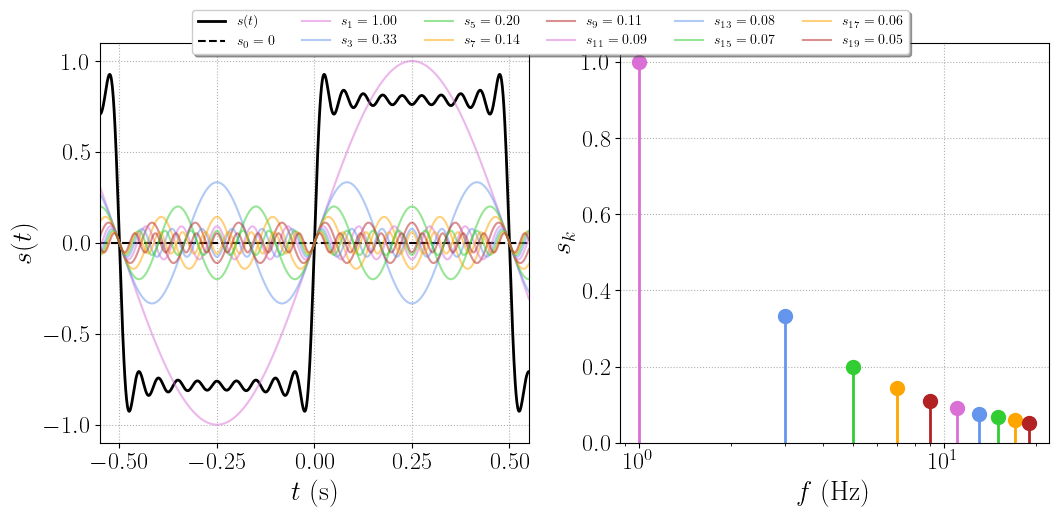

In [289]:
f0 = 1 # Hz
tlin = np.linspace(-.55, .55, 1000)
dt = 1/100

s0 = 0
num = 10
klist = [2*k+1 for k in range(0,num)]
sklist = [1/(2*k+1) for k in range(0,num)]
fklist = [0 for k in range(0,num)]

fig = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
              fltrd=False, vert=False, lgd=True, ncols=6)
fig.savefig(f"../figures/fft_creneau.pdf".replace(" ", ""),
            bbox_inches="tight")


In [291]:
def fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
            fltrd=False, vert=True, lgd=True, ncols=None):
    w0 = 2*np.pi*f0
    if fltrd:
        sklist_fltrd = [abs(Hrc(k*f0, R, C))*sk for k,sk in zip(klist,sklist)]
        fklist_fltrd = [fk+cmath.phase(Hrc(k*f0, R, C))
                        for k,fk in zip(klist,fklist)]
        fcoup = 1/(2*np.pi*R*C)
        siglist_fltrd = [sk*np.sin(k*w0*tlin + fk)
                         for k,sk,fk in zip(klist,
                                            sklist_fltrd, fklist_fltrd)]
        s0_fltrd = abs(Hrc(0, R, C))*s0
        sigsum_fltrd = s0_fltrd + sum(siglist_fltrd)
    else:
        siglist = [sk*np.sin(k*w0*tlin + fk)
                  for k,sk,fk in zip(klist, sklist, fklist)]
        sigsum = s0 + sum(siglist)
    if vert:
        fig = plt.figure(figsize=[5,7])
        ax1 = fig.add_axes([0.1, 0.10, 0.8, 0.35])
        ax2 = fig.add_axes([0.1, 0.50, 0.8, 0.35])
    else:
        fig = plt.figure(figsize=[13,5])
        ax1 = fig.add_axes([0.5, 0.10, 0.33, 0.8])
        ax2 = fig.add_axes([0.1, 0.10, 0.33, 0.8])
    ax1.set_xscale("log")
    if fltrd:
        ax1.plot([0,0], [0,s0_fltrd],
                marker="o", markersize="10", markevery=[1],
                color="k", lw=2)
    else:
        ax1.plot([0,0], [0,s0],
                marker="o", markersize="10", markevery=[1],
                color="k", lw=2)
    if fltrd:
        ax2.plot(tlin, sigsum_fltrd,
                  lw=2,
                  color='k', label='$s(t)$')
        ax2.axhline(s0_fltrd, ls='--',
                    color='k', label=fr'$s_0 = {s0}$')
    else:
        ax2.plot(tlin, sigsum,
                  lw=2,
                  color='k', label='$s(t)$')
        ax2.axhline(s0, ls='--',
                    color='k', label=fr'$s_0 = {s0}$')
    for k in range(len(klist)):
        if len(klist) > 5:
            col = next(cycle_colors)
        else:
            col = colors[k]
        if fltrd:
            ax1.plot([klist[k]*f0,klist[k]*f0], [0,sklist[k]],
                      marker="o", markersize="10", markevery=[1],
                      color=col, lw=2, ls='--', alpha=.5)
            ax1.plot([klist[k]*f0,klist[k]*f0], [0,sklist_fltrd[k]],
                      marker="o", markersize="10", markevery=[1],
                      color=col, lw=2)
            ax2.plot(tlin, siglist_fltrd[k],
                      color=col,
                      alpha=.5,
                      label=fr'$s_{{{klist[k]*f0}}} = {sklist_fltrd[k]:.2f}$')
        else:
            ax1.plot([klist[k]*f0,klist[k]*f0], [0,sklist[k]],
                      marker="o", markersize="10", markevery=[1],
                      color=col, lw=2)
            ax2.plot(tlin, siglist[k],
                      color=col,
                      alpha=.5,
                      label=fr'$s_{{{klist[k]*f0}}} = {sklist[k]:.2f}$')
    if fltrd:
        ax1.axvline(fcoup, color='k', ls=':',
                    label=fr'$f_c = {fcoup:.2f}$ Hz')

        flin = np.linspace(0, 1.05*max(klist)*f0, 1000)
        ax1.plot(flin, abs(Hrc(flin, R, C)), color='k', label=fr'$G(f)$')
    if lgd:
        if vert:
            ax2.legend(loc='upper right', fontsize=18)
        else:
            if ncols is None:
                ncols=len(klist)+2
            else:
                pass
            ax2.legend(ncol=ncols,
                       loc='upper center',
                       bbox_to_anchor=(1.05, 1.1),
                       fancybox=True, shadow=True,
                       fontsize=10)
            if fltrd:
              ax1.legend()
    ax1.set_ylim(bottom=0)
    # ax1.set_xlim(left=-1)
    ax2.set_xlim(min(tlin), max(tlin))

    ax1.grid(linestyle=':')
    ax1.tick_params(labelsize='xx-large')
    ax2.grid(linestyle=':')
    ax2.tick_params(labelsize='xx-large')

    ax1.set_xlabel('$f$ (Hz)', fontsize=20)
    ax1.set_ylabel('$s_k$', fontsize=20)
    ax2.set_xlabel('$t$ (s)', fontsize=20)
    ax2.set_ylabel('$s(t)$', fontsize=20)

    # return sigFFTPos, freqAxisPos
    return fig

1.5915494309189534e-05


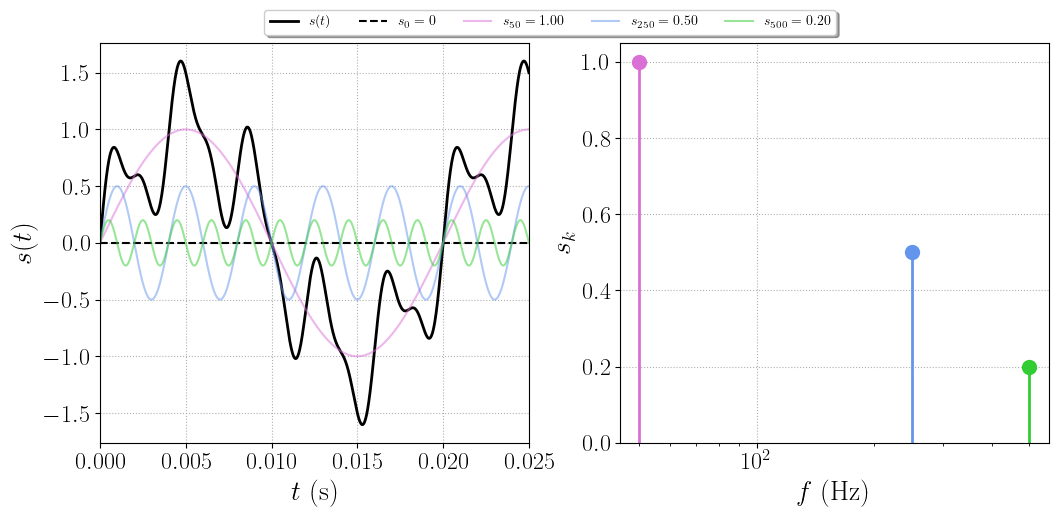

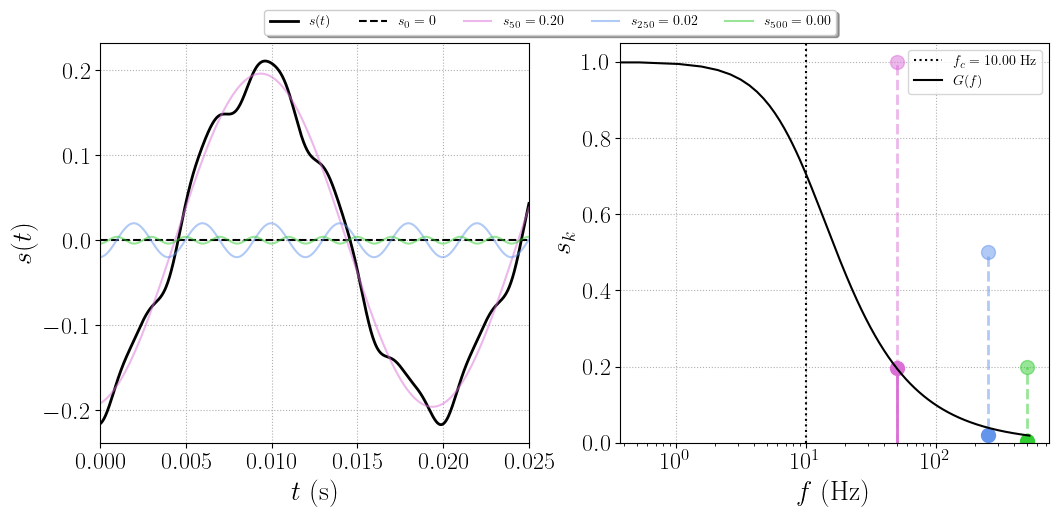

In [292]:
def Hrc(f, R, C):
    w = 2*np.pi*f
    wo = 1/(R*C)
    return (1/(1+1j*w/wo))

R = 1e3
fo = 10 # Hz
wo = 2*np.pi*fo
C = 1/(R*wo)
print(C)

f0 = 50 # Hz
tlin = np.linspace(0, 2.5e-2, 1000)
dt = 1/1100

e0 = 0
klist = [1, 5, 10]
sklist = [1,.5, 0.2]
fklist = [0, 0, 0]
skoutl = [abs(Hrc(k*f0, R, C))*sk for k,sk in zip(klist,sklist)]

fig = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
              fltrd=False, vert=False, lgd=True, ncols=6)
fig.savefig(f"../figures/fft_{f0}_{klist[:]}_{sklist[:]}.pdf".replace(" ",
                                                                      ""),
            bbox_inches="tight")
fig2 = fftPlot(f0, s0, klist, sklist, fklist, tlin, dt,
              fltrd=True, vert=False, lgd=True, ncols=6)
fig2.savefig(f"../figures/fft_{f0}_{klist[:]}_{sklist[:]}_fc={fo}.pdf".replace(" ",
                                                                      ""),
            bbox_inches="tight")

In [ ]:
def fftPlot_out(f0, s0, klist, sklist, fklist, tlin, dt,
                vert=True, lgd=True, ncols=None,):
    w0 = 2*np.pi*f0
    siglist = [sk*np.sin(k*w0*tlin + fk)
               for k,sk,fk in zip(klist, sklist, fklist)]
    sigsum = s0 + sum(siglist)

    tfrq = np.arange(0, 1+dt, dt)
    # tfrq = np.arange(0, sig.shape[-1]) * dt
    sigfrqlst = [sk*np.sin(k*w0*tfrq + fk)
                 for k,sk,fk in zip(klist, sklist, fklist)]
    sigfrq = s0 + sum(sigfrqlst)

    # Here it's assumes analytic signal (real signal...) - so only half of the axis is required

    if sigfrq.shape[0] % 2 != 0:
        # warnings.warn("signal preferred to be even in size, autoFixing it...")
        tfrq = tfrq[0:-1]
        sigfrq = sigfrq[0:-1]

    sigFFT = np.fft.fft(sigfrq) / tfrq.shape[0]  # Divided by size t for coherent magnitude

    freq = np.fft.fftfreq(tfrq.shape[0], d=dt)

    # Plot analytic signal - right half of frequence axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if vert:
        fig = plt.figure(figsize=[5,7])
        ax1 = fig.add_axes([0.1, 0.10, 0.8, 0.35])
        ax2 = fig.add_axes([0.1, 0.50, 0.8, 0.35])
    else:
        fig = plt.figure(figsize=[13,5])
        ax1 = fig.add_axes([0.5, 0.10, 0.33, 0.8])
        ax2 = fig.add_axes([0.1, 0.10, 0.33, 0.8])

    # ax1.plot(freqAxisPos,
    #          np.abs(sigFFTPos))
    ax1.plot([0,0], [0,s0],
             marker="o", markersize="10", markevery=[1],
             color="k", lw=2)
    ax2.plot(tlin, sigsum,
              lw=2,
              color='k', label='$s(t)$')
    ax2.axhline(s0, ls='--',
                color='k', label=fr'$s_0 = {s0}$')
    for k in range(len(klist)):
        col = next(colors)
        ax1.plot([klist[k]*f0,klist[k]*f0], [0,sklist[k]],
                  marker="o", markersize="10", markevery=[1],
                  color=col, lw=2)
        ax2.plot(tlin, siglist[k],
                  color=col,
                  alpha=.5,
                  label=fr'$s_{{{klist[k]*f0}}} = {sklist[k]:.2f}$')

    if lgd:
        if vert:
            ax2.legend(loc='upper right', fontsize=18)
        else:
            if ncols is None:
                ncols=len(klist)+2
            else:
                pass
            ax2.legend(ncol=ncols,
                       loc='upper center',
                       bbox_to_anchor=(1.05, 1.1),
                       fancybox=True, shadow=True,
                       fontsize=10)
    ax1.set_ylim(bottom=0)
    # ax1.set_xlim(left=-1)
    ax2.set_xlim(min(tlin), max(tlin))

    ax1.grid(linestyle=':')
    ax1.tick_params(labelsize='xx-large')
    ax2.grid(linestyle=':')
    ax2.tick_params(labelsize='xx-large')

    ax1.set_xlabel('$f$ (Hz)', fontsize=20)
    ax1.set_ylabel('$s_k$', fontsize=20)
    ax2.set_xlabel('$t$ (s)', fontsize=20)
    ax2.set_ylabel('$s(t)$', fontsize=20)

    # fig.suptitle('Test')

    # return sigFFTPos, freqAxisPos
    return fig

